In [107]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/baldeeb/Code/pytorch-NOCS')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
import torch

from quaternion import from_euler_angles, as_rotation_matrix
def get_random_Rts():
    euler_angles = torch.rand(3) * 2 * torch.pi
    R = torch.tensor(as_rotation_matrix(from_euler_angles(euler_angles)))
    t = torch.rand(3) * 3 # translation 
    scale = torch.rand(1) * 2
    Rts = torch.concatenate([R, t[:, None]], dim=1) * scale

    print(f'scale {scale} - offset {t}')
    return Rts.float()

t = torch.linspace(0, 10 * torch.pi, 1000)  # Parametric variable
x = torch.sin(t)
y = torch.cos(t)
z = t

Rts = torch.stack([get_random_Rts() for _ in range(4)])
homogenized = lambda x: torch.concatenate([x, 
                                          torch.ones(1,x.shape[1])], 
                                          dim=0)

xyz = torch.stack([x,y,z], dim=0)
xyz_hat = Rts @ homogenized(xyz)[None]


scale tensor([1.9594]) - offset tensor([2.6135, 2.6777, 0.8663])
scale tensor([1.5812]) - offset tensor([1.2849, 2.1171, 1.6339])
scale tensor([0.1511]) - offset tensor([0.1872, 0.2417, 0.1766])
scale tensor([0.8408]) - offset tensor([0.9487, 0.7138, 2.1750])


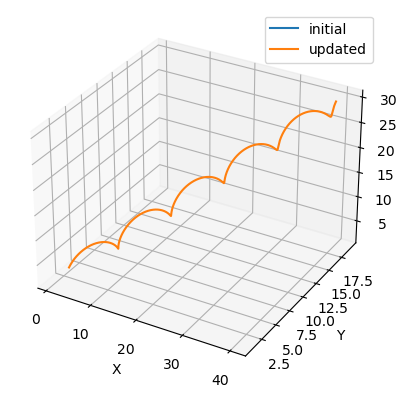

In [145]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def plot_xyz(ax, pts, label='', pattern='-'):
    ax.plot(pts[0], pts[1], pts[2], pattern, label=label)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()


# Plot the 3D spiral with random transformations
sample_i = 1
fig = plt.figure()
axs = fig.add_subplot(111, projection='3d')
plot_xyz(axs, xyz[sample_i].cpu().numpy(), label='initial')    
plot_xyz(axs, xyz_hat[sample_i].cpu().numpy(), label='updated')    
plt.show()


In [142]:
from utils.alignment.alignment import align_3d_points
P, Q = xyz_hat.T[None], xyz.T[None]

# Rts, _, _, = align_3d_points(P, Q)
Rt, s, _, = align_3d_points(P, Q)
print(Rt.shape, s.shape)
Rts = Rt * s
new_xyz_hat = Rts[0] @ homogenized(xyz_hat[sample_i])

fig = plt.figure()
axs = fig.add_subplot(111, projection='3d')
plot_xyz(axs, xyz[sample_i].cpu().numpy(), label='initial')    
plot_xyz(axs, xyz_hat[sample_i].cpu().numpy(), label='rotated')    
plot_xyz(axs, new_xyz_hat.cpu().numpy(), label='fixed', pattern='.')    
plt.show()

ValueError: too many values to unpack (expected 3)